# Linear Convection with 1st Order Upwind, Leapfrog, Lax-Friedrich and Lax-Wendroff schemes

## Understand the problem
- What is the final velocity profile for 1D linear convection when the initial conditions are a step function moving to the right with a constant average velcoity $c$ = 1
- The linear convection phenomena is described by the following equation:

\begin{equation}
\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} = 0
\end{equation}

## Formulate the problem

### Input Data

- nt = 51 (number of temporal points)

- nx = 21 (number of spatial points)

- tmax = 0.5

- xmax = 2

- c = 1

- We require a heaviside wave as initial condition:
    - Initial conditions:  
    \begin{equation}
    u(x, t = 0) = \left\{\begin{matrix} 1 & 0 \leq x \leq 2 \\ 0 & 2 < x \leq 4 \end{matrix}\right.
    \end{equation}
    
    - Boundary conditions: 
    \begin{equation}
    u(x = 0, t) = 1.0 \\ u(x = 4, t) = 0.0
    \end{equation}

### Output data

We want to compute the solution $u(x,t)$ elsewhere.

## Algorithm for problem solving

### Numerical schemes:
- First Order Upwind Scheme (FTBS)
- LeapFrog Scheme
- Lax-Friendrich Scheme
- Lax-Wendroff Scheme

### Discretization and Transposition
#### 1$^{\textrm{st}}$ order Upwind
\begin{equation}
\frac{u^{n+1}_{i} - u^{n}_{i}}{\Delta t} + c \frac{u^{n}_{i} - u^{n}_{i-1}}{\Delta x} = 0
\end{equation}
After transposition, we get:
\begin{equation}
u^{n+1}_{i}  = u^{n}_{i} - \sigma (u^{n}_{i} - u^{n}_{i-1})
\end{equation}
With: 
\begin{equation}
\:\: \sigma = c\frac{\Delta t}{\Delta x}
\end{equation}

#### LeapFrog Scheme (2nd Order CD in both space and Time)
\begin{equation}
\frac{u^{n+1}_{i} - u^{n-1}_{i}}{2\Delta t} + c \frac{u^{n}_{i+1} - u^{n}_{i-1}}{2\Delta x} = 0
\end{equation}

After transposition we get:
\begin{equation}
u^{n+1}_{i} = u^{n-1}_{i} - \sigma \left (u^{n}_{i+1} - u^{n}_{i-1}  \right )
\end{equation}
With:
\begin{equation}
\sigma = c \frac{\Delta t}{\Delta x}
\end{equation}
- As we can deduce from the leapfrong scheme, Given an initial condition, we still need a second condition initially to begin the simulation with ! This problem in the leapfrog scheme can be avoided by begining the simulation with a scheme other than the LeapFrog scheme ! We will launch the simulation using the Upwind Scheme !

#### Lax-Friedrich Scheme 
- The Lax-Friedrichs scheme can be written as:

\begin{equation}
u^{n+1}_{i} = \frac{1}{2}\left ( u^{n}_{i+1} + u^{n}_{i-1} \right ) - \frac{\sigma}{2} \left (u^{n}_{i+1} - u^{n}_{i-1}  \right )
\end{equation}

#### Lax-Wendroff Scheme


### Remarks:
- Given the results in the previous steps ! It will be useful if we can control the stability by controlling the CFL number ! In order to do so, we will constraint the number of time steps by choosing an appropriate number of grid points and fixing the CFL number to some value given the value of $c$.

### Pseudo Code: 

In [ ]:
# Define Constantes:
nx = 21 
tmax = 0.5
xmax = 2
c = 1
CFL = 1.0  (=cdt/dx)
dx = xmax/(nx-1)
dt = CFL*dx/c
nt = int((tmax/dt)+1)

# Boundary conditions:
for between 0 and nt-1; u(0, t) = 1.0 and u(2, t) = 0.0

# Initial conditions:
for i between 0 and 4; 
    if 0.0 <= x <= 2.0; u(x, 0) = 1.0
    else; u(x,0) = 0.0

# Solution with the UPWIND:
for n between 0 and nt-1;
    for i between 1 and nx-2;
        u(n+1, i) = u(n, i) - sigma*(u(n, i+1) - u(n, i-1))
        
# Solution with LeapFrog:
## --- Begin with an UPWIND 
for n between 0 and 1;
    for i between 1 and nx-2;
        u(n+1, i) = u(n, i) - sigma*(u(n, i) - u(n, i-1))
        
## --- Continue with the LeapFrog
for n between 1 and nt-1;
    for i between 1 and nx-2;
        u(n+1, i) = u(n-1, i) - sigma*(u(n, i) - u(n, i-1))
        
# Solution with Lax-Friedrich:
for n between 0 and nt-1;
    for i between 1 and nx-2;
        u(n+1, i) = u(n, i) - sigma*(u(n, i) - u(n, i-1))
        
# Solution with Lax-Wendroff:
for n between 0 and nt-1;
    for i between 1 and nx-2;
        u(n+1, i) = u(n, i) - sigma*(u(n, i) - u(n, i-1))

### Define the analytical solution: 

In [2]:
def analytical_convection(tmax, xmax, nx, c, CFL = 1.0):
    
    import numpy as np 
    
    x = np.linspace(0.0, xmax, nx)
    dx = xmax/(nx-1)
    dt = CFL*dx/c
    nt = int((tmax/dt)+1)
    
    t = np.linspace(0.0, tmax, nt)
    u = np.zeros((nt, nx))
    
    for iteration in range(nt):
        for i in range(nx):
            if 0.0 <= np.abs(x[i] - c*t[iteration]) <= 2.0:
                u[iteration, i] = 1.0
    
    return u

### Define the initial profile: 

In [3]:
def Initial_Boundary(xmax, nx, nt):

    import numpy as np 
    # Define Container for the solution
    x = np.linspace(0.0, xmax, nx)
    u = np.zeros((nt, nx))
    
    # Initial conditions
    for i in range(nx):
        if 0.0 <= x[i] <= 2.0:
            u[0, i] = 1.0
            
    # Boundary conditions
    u[:, 0] = 1.0 
    u[:, nx-1] = 0.0
    
    return x, u

In [5]:
def Convection_Solver(tmax, xmax, nx, c, CFL = 1.0):

    import numpy as np 

    # Grid parameters
    dx = xmax/(nx-1)
    dt = CFL*dx/c
    nt = int((tmax/dt)+1)
        
    # Solution containers, Initial and Boundary conditions
    x, u = Initial_Boundary(xmax, nx, nt)
    
    # Solvers
    for n in range(nt-1):
        for i in range(1, nx-1):
            u[n+1, i] = u[n, i] - CFL*(u[n, i] - u[n, i-1])
    
    return nt, x, u

### Basic Plotter

In [6]:
def Plotter(x, u, tmax, xmax, nx, c, CFL = 1.0, iteration = 0):
    
    import numpy as np
    import matplotlib.pyplot as plt

    dx = xmax/(nx-1)
    dt = CFL*dx/c
    nt = int((tmax/dt)+1)
    
    CFL = float(round(CFL, 3))
    
    t = iteration*dt
    t = float(round(t, 2))
    
    fig, ax = plt.subplots(figsize = [8.5, 5.8])
    
    ax.set_xlim(0.0, xmax)
    ax.set_xlabel("x(SI)")
    ax.set_ylabel("u(x,t = {:})".format(t))
    ax.plot(x, u[iteration, :], label = "Numerical Solution, CFL = {:}".format(CFL))
    
    
    plt.legend(loc = 'best')
    plt.grid(True)
    plt.show()

nt = 126


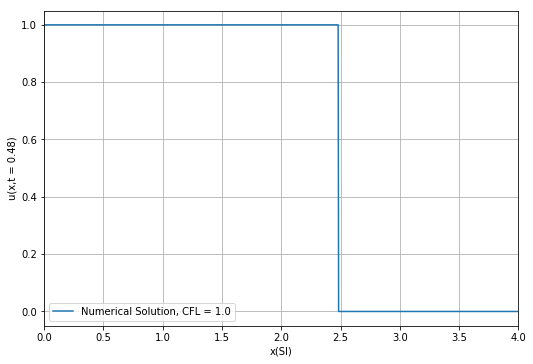

In [8]:
(tmax, xmax, nx, c) = (0.5, 4.0, 1001, 1.0)
nt, x, u = Convection_Solver(tmax, xmax, nx, c)
print("nt =", nt)
Plotter(x, u, tmax, xmax, nx, c, iteration = 120)

### Many instances plotter

In [9]:
def Plotter_2(x, u, tmax, xmax, nx, c, CFL = 1.0):
    
    import numpy as np
    import matplotlib.pyplot as plt

    dx = xmax/(nx-1)
    dt = CFL*dx/c
    nt = int((tmax/dt)+1)
    
    CFL = float(round(CFL, 3))
    
    fig, ax = plt.subplots(figsize = [8.5, 5.8])
    
    Nb = int(nt/5)
    for iteration in range(0, nt, Nb):
        
        t = iteration*dt
        t = float(round(t, 2))
        
        ax.plot(x, u[iteration, :], label = "t = {:}".format(t))
    
    ax.set_title("Numerical solution for CFL = {:}".format(CFL))
    ax.set_xlim(0.0, xmax)
    ax.set_xlabel("x(SI)")
    ax.set_ylabel("u(x,t)")
    plt.legend(loc = 'best')
    plt.grid(True)
    plt.show()

nt = 126


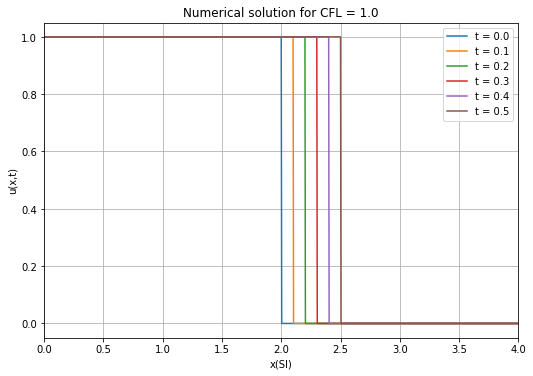

In [10]:
(tmax, xmax, nx, c) = (0.5, 4.0, 1001, 1.0)
nt, x, u = Convection_Solver(tmax, xmax, nx, c)
print("nt =", nt)
Plotter_2(x, u, tmax, xmax, nx, c)

### Define a Plotter for comparaison between analytical and numerical solutions:

In [15]:
def Plotter_3(x, u, u_analytical, tmax, xmax, nx, c, CFL = 1.0, iteration = 0):
    
    import numpy as np
    import matplotlib.pyplot as plt

    dx = xmax/(nx-1)
    dt = CFL*dx/c
    nt = int((tmax/dt)+1)
    
    t = iteration*dt
    
    fig, ax = plt.subplots(figsize = [8.5, 5.8])
    
    ax.set_xlim(0.0, xmax)
    ax.set_xlabel("x(SI)")
    ax.set_ylabel("u(x,t = {:})".format(t))
    ax.plot(x, u[iteration, :], color = "red", label = "Numerical Solution a t = {:}".format(t))
    ax.plot(x, u_analytical[iteration, :], linestyle = ":", linewidth = "2.5", label = "Analytical Solution a t = {:}".format(t))

    
    ax.set_title("CFL = {:}".format(CFL))
    plt.legend(loc = 'best')
    plt.grid(True)
    plt.show()

nt = 188


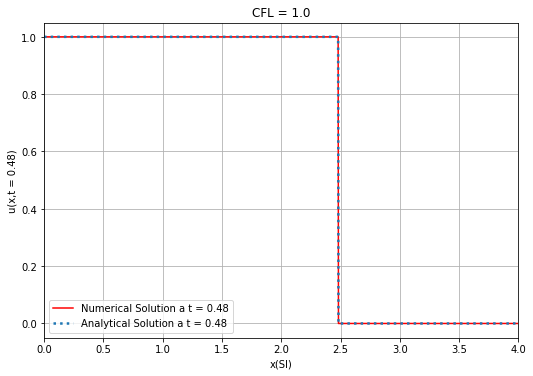

In [16]:
(tmax, xmax, nx, c) = (0.5, 4.0, 1501, 1.0)
nt, x, u = Convection_Solver(tmax, xmax, nx, c)
u_analytical = analytical_convection(tmax, xmax, nx, c)
print("nt =", nt)
Plotter_3(x, u, u_analytical, tmax, xmax, nx, c, iteration = 180)

## Define the other schemes:
- In this section we will define a unifed code for all schemes by making use of the convection solver previously defined !

In [17]:
def Convection_Solver_All_Schemes(tmax, xmax, nx, c, CFL = 1.0):

    import numpy as np 

    # Grid parameters
    dx = xmax/(nx-1)
    dt = CFL*dx/c
    nt = int((tmax/dt)+1)
        
    # Solution containers, Initial and Boundary conditions
    x, u = Initial_Boundary(xmax, nx, nt)
    
    # Solvers
    choice = int(input("Choose one of the following methods:\n 1- First Order Upwind\n 2- LeapFrog scheme\n 3- Lax-Friedrich Scheme\n 4- Lax-Wendroff Scheme\n \t Votre choix: "))
    
    if choice == 1:
        ### --- First Order Upwind
        for n in range(nt-1):
            for i in range(1, nx-1):
                u[n+1, i] = u[n, i] - CFL*(u[n, i] - u[n, i-1])
    
    elif choice == 2:
        ### --- LeapFrog Scheme
        for n in range(nt-1):
            for i in range(1, nx-1):
                if n <= 1:
                    u[n+1, i] = u[n, i] - CFL*(u[n, i] - u[n, i-1])
                else:
                    u[n+1, i] = u[n-1, i] - CFL*(u[n, i+1] - u[n, i-1])
    elif choice == 3:
        ### --- Lax-Friedrich Scheme
        for n in range(nt-1):
            for i in range(1, nx-1):
                u[n+1, i] = (u[n, i+1] + u[n, i-1] - CFL*(u[n, i+1] - u[n, i-1]))/2
    elif choice == 4:
        ### --- Lax-Wendroff Scheme
        for n in range(nt-1):
            for i in range(1, nx-1):
                u[n+1, i] = u[n, i] - 0.5*CFL*(u[n, i+1] - u[n, i-1]) + 0.5*(CFL**2)*(u[n, i+1] - 2*u[n, i] + u[n, i-1])    
    
    else: 
        raise ValueError("Out of bounds !! Retry !!")
        
    
    return nt, x, u

Choose one of the following methods:
 1- First Order Upwind
 2- LeapFrog scheme
 3- Lax-Friedrich Scheme
 4- Lax-Wendroff Scheme
 	 Votre choix: 3
nt = 126


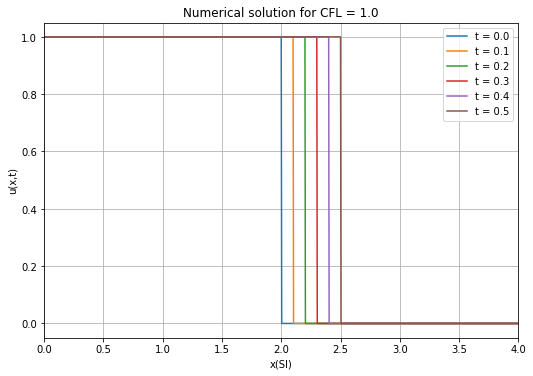

In [20]:
(tmax, xmax, nx, c) = (0.5, 4.0, 1001, 1.0)
nt, x, u = Convection_Solver_All_Schemes(tmax, xmax, nx, c)
print("nt =", nt)
Plotter_2(x, u, tmax, xmax, nx, c)

### Comments
- When the CFL number is equal to unity, perfect solutions are obtained from all the numerical schemes. There is no dispersion nor diffusion errors.

### compare between schemes for CFL numbers other than unity 

Choose one of the following methods:
 1- First Order Upwind
 2- LeapFrog scheme
 3- Lax-Friedrich Scheme
 4- Lax-Wendroff Scheme
 	 Votre choix: 1
nt = 47


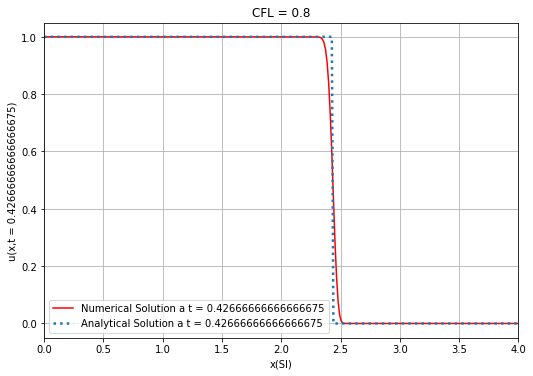

In [23]:
(tmax, xmax, nx, c, CFL) = (0.5, 4.0, 301, 1.0, 0.8)
nt, x, u = Convection_Solver_All_Schemes(tmax, xmax, nx, c, CFL)
u_analytical = analytical_convection(tmax, xmax, nx, c, CFL)
print("nt =", nt)
Plotter_3(x, u, u_analytical, tmax, xmax, nx, c, CFL, iteration = 40)

Choose one of the following methods:
 1- First Order Upwind
 2- LeapFrog scheme
 3- Lax-Friedrich Scheme
 4- Lax-Wendroff Scheme
 	 Votre choix: 2
nt = 47


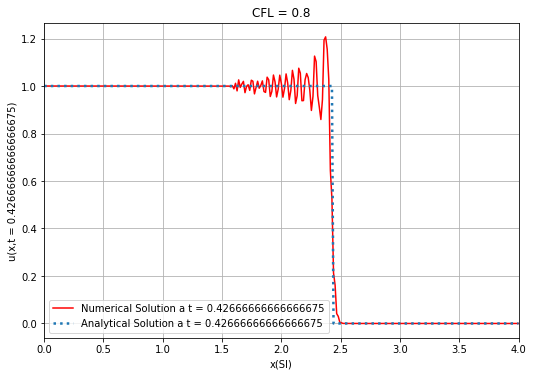

In [24]:
(tmax, xmax, nx, c, CFL) = (0.5, 4.0, 301, 1.0, 0.8)
nt, x, u = Convection_Solver_All_Schemes(tmax, xmax, nx, c, CFL)
u_analytical = analytical_convection(tmax, xmax, nx, c, CFL)
print("nt =", nt)
Plotter_3(x, u, u_analytical, tmax, xmax, nx, c, CFL, iteration = 40)

Choose one of the following methods:
 1- First Order Upwind
 2- LeapFrog scheme
 3- Lax-Friedrich Scheme
 4- Lax-Wendroff Scheme
 	 Votre choix: 3
nt = 47


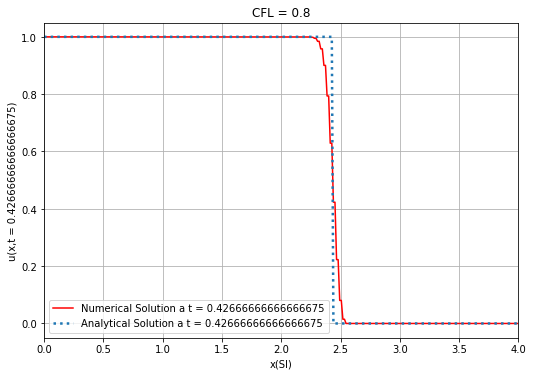

In [25]:
(tmax, xmax, nx, c, CFL) = (0.5, 4.0, 301, 1.0, 0.8)
nt, x, u = Convection_Solver_All_Schemes(tmax, xmax, nx, c, CFL)
u_analytical = analytical_convection(tmax, xmax, nx, c, CFL)
print("nt =", nt)
Plotter_3(x, u, u_analytical, tmax, xmax, nx, c, CFL, iteration = 40)

Choose one of the following methods:
 1- First Order Upwind
 2- LeapFrog scheme
 3- Lax-Friedrich Scheme
 4- Lax-Wendroff Scheme
 	 Votre choix: 4
nt = 47


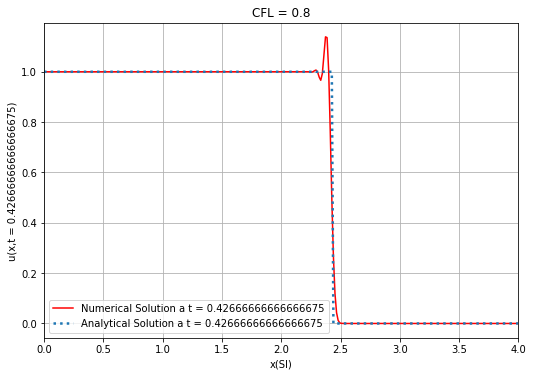

In [26]:
(tmax, xmax, nx, c, CFL) = (0.5, 4.0, 301, 1.0, 0.8)
nt, x, u = Convection_Solver_All_Schemes(tmax, xmax, nx, c, CFL)
u_analytical = analytical_convection(tmax, xmax, nx, c, CFL)
print("nt =", nt)
Plotter_3(x, u, u_analytical, tmax, xmax, nx, c, CFL, iteration = 40)

## Remarks
- In our attempt of solving the linear convection equation using different schemes we noticed that a perfect solution is obtained when the phase angle is zero (CFL = 1.0), while for a CFL number other than unity (CFL = 0.8 for example), one can see that, given the same conditions:

    - For the first Order UPWIND scheme, the solution is very close to the analytical solution except for a small amount of numerical diffusion.
    - For the LeapFrog scheme, one can see that there are wiggles in the numerical solution which refers to a significant amount of numerical dispersion behind the wave while these wiggles do not show up in the front of the wave. The amount of diffusion seems to be the same as for the first order UPWIND. We can also notice a jagged line in the front of the wave.
    - The Lax-Friedrich scheme seems to reproduce very well the actual solution except for the jagged line produced by this scheme and we can also see that this scheme produces a little more dissipation than first order Upwinding or the leapFrog schemes.
    - The Lax-Wendroff scheme seems to reproduce well the actual solution with a little bit less diffusion than the other schemes which is great ! But, we can notice the strange wiggling in the back.
    
## Explanations
#### Origin of the jagged lines
- It seems that there is a double solution appearing in the front of the wave in the leapfrog and LF schemes. In the leapfrog scheme for example, we can understand the jagged line behavior from the stencil of the scheme. From the stencil of the leapfrog scheme, we can notice that $u^{n+1}_{i}$ does not depend on $u^{n}_{i}$, if we shift the stencil by $\Delta_x$ to the right we can see that, again,  $u^{n+1}_{i+1}$ does not depend on $u^{n}_{i+1}$, and that there is no common mesh point in the stencil between $u^{n+1}_{i}$ and $u^{n+1}_{i+1}$, while $u^{n+1}_{i}$ and $u^{n+1}_{i+2}$ share a single mesh point in their stencil and the same goes for $u^{n+1}_{i+1}$ and $u^{n+1}_{i+3}$ and so on ! In this case, we talk about Odd Even decoupling ! That is, the solution on even points have different error levels than the solutions on odd points and they don't communicate information and that is what explains the jagged line behavior !

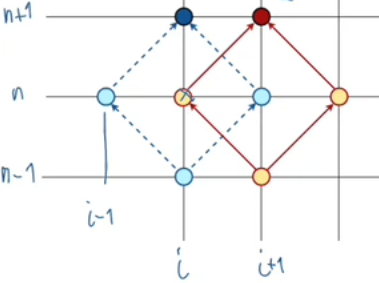

In [52]:
from IPython.display import Image
Image("/home/mouloud/Desktop/Doctorat/Modelisation/Lorena_Barba/Modules_pratiques/Figures/Fig1.png")

## Conclusions:
- We can deduce from all the numerical schemes presented so far that most of them represent the "jump" (from 1 to 0) with a fine accuracy as they are second order schemes. This is pretty interesting in the context of numerical modelling as one of the biggest difficulties in CFD is the modelling of sharp gradients that occur in most of the physical phenomenas involving shocks !  